In [3]:
import numpy as np
import matplotlib.pyplot as plt

import random, math
from nsga2 import Solution
from nsga2 import NSGAII

% matplotlib inline

Define test function

In [4]:
class ZDT1Solution(Solution):
    '''
    Solution for the ZDT1 function.
    '''
    def __init__(self):
        '''
        Constructor.
        '''
        Solution.__init__(self, 2)
        
        self.xmin = 0.0
        self.xmax = 1.0
        
        for _ in range(30):
            self.attributes.append(random.random())
        
        self.evaluate_solution()
        
    def evaluate_solution(self):
        '''
        Implementation of method evaluate_solution() for ZDT1 function.
        '''
        self.objectives[0] = self.attributes[0]
        
        sum = 0.0
        for i in range(1, 30):
            sum += self.attributes[i]
            
        g = 1.0 + (9.0 * (sum / 29))
        
        self.objectives[1] = g * (1.0 - math.sqrt(self.attributes[0] / g))
        
    def crossover(self, other):
        '''
        Crossover of ZDT1 solutions.
        '''
        child_solution = ZDT1Solution()
        
        for i in range(30):
            child_solution.attributes[i] = math.sqrt(self.attributes[i] * other.attributes[i])
        
        return child_solution
    
    def mutate(self):
        '''
        Mutation of ZDT1 solution.
        '''
        self.attributes[random.randint(0, 29)] = random.random()

In [5]:
nsga2 = NSGAII(2, 0.1, 1.0)
    
P = []
for i in range(50):
    P.append(ZDT1Solution())

nsga2.run(P, 50, 20)

Iteration  0
Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10
Iteration  11
Iteration  12
Iteration  13
Iteration  14
Iteration  15
Iteration  16
Iteration  17
Iteration  18
Iteration  19


Visualise final generation 

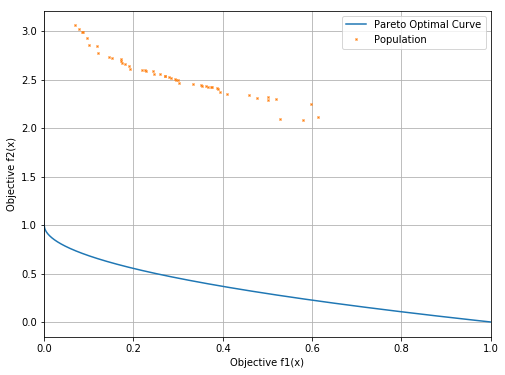

In [17]:
plt.figure(figsize = (8, 6))

f1 = np.linspace(0, 1, 1000)
f2 = 1.0 - np.sqrt(f1)
plt.plot(f1, f2, label = 'Pareto Optimal Curve')

plt.plot([p.objectives[0] for p in P], 
         [p.objectives[1] for p in P],
         'x', 
         markersize = 2,
         label = 'Population')

plt.ylabel('Objective f2(x)')
plt.xlabel('Objective f1(x)')
plt.grid(which = 'both')
plt.legend()
plt.xlim([0, 1])
plt.show()